In [39]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns 


In [14]:
df_sonar = pd.read_csv('D:\FPTUniversity\Semester 4\AIL303m\Projects\data\Sonar.csv')
df_sonar

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,0
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,0
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,0
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,0


In [15]:
df_sonar.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507,0.466346
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031,0.500070
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600,0.000000
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100,0.000000
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300,0.000000
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525,1.000000
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900,1.000000


In [21]:
df_sonar.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41',
       'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51',
       'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'Class'],
      dtype='object')

In [22]:
df_sonar['Class'].value_counts()

0    111
1     97
Name: Class, dtype: int64

0 == Mine;
1 == Rock


In [24]:
df_sonar.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60
Class,,,,,,,,,,,,,,,,,,,,,
0,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
1,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


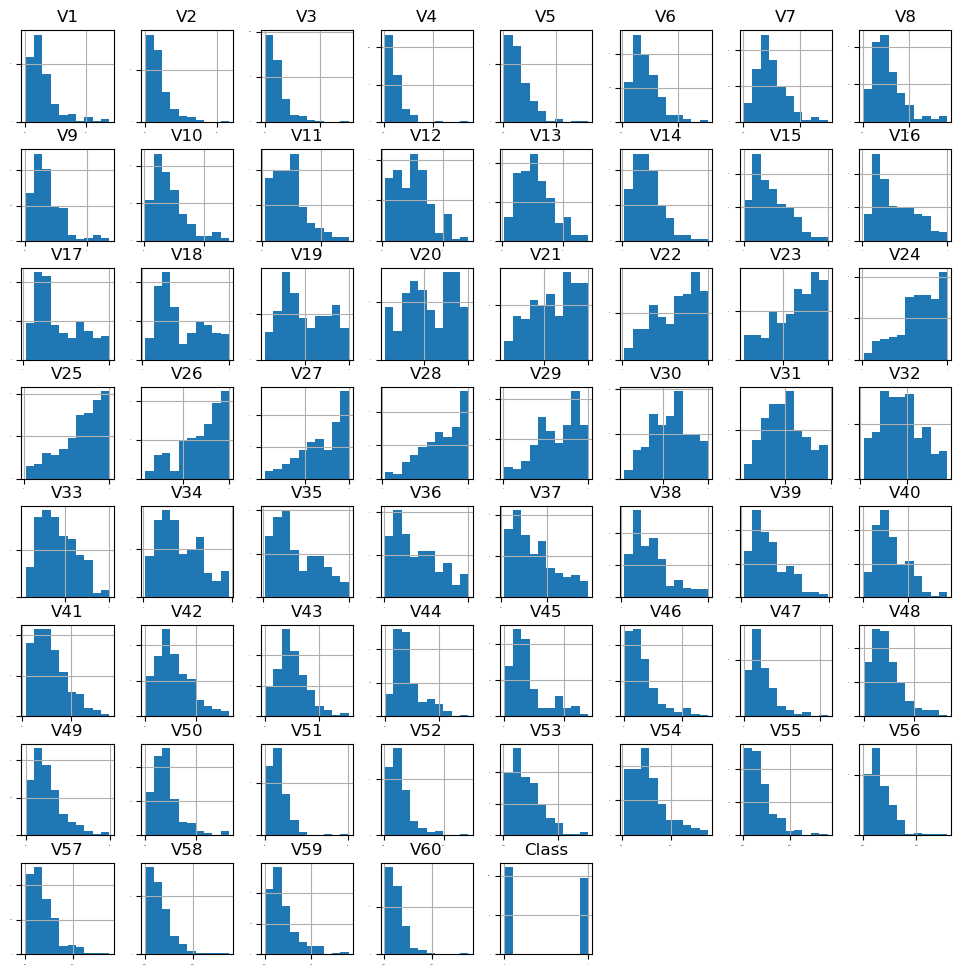

In [36]:
df_sonar.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

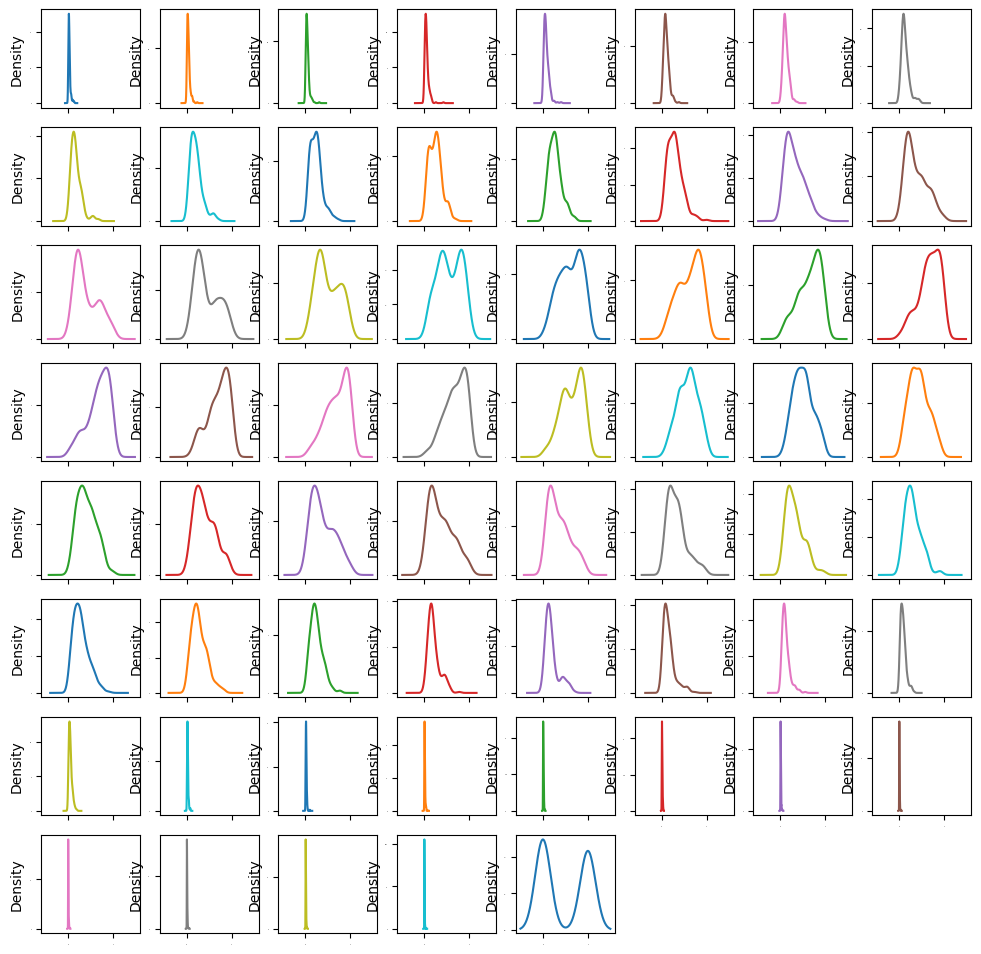

In [38]:
df_sonar.plot(kind= 'density', subplots= True, layout= (8,8), fontsize=1, figsize= (12,12), legend= False)
plt.show()

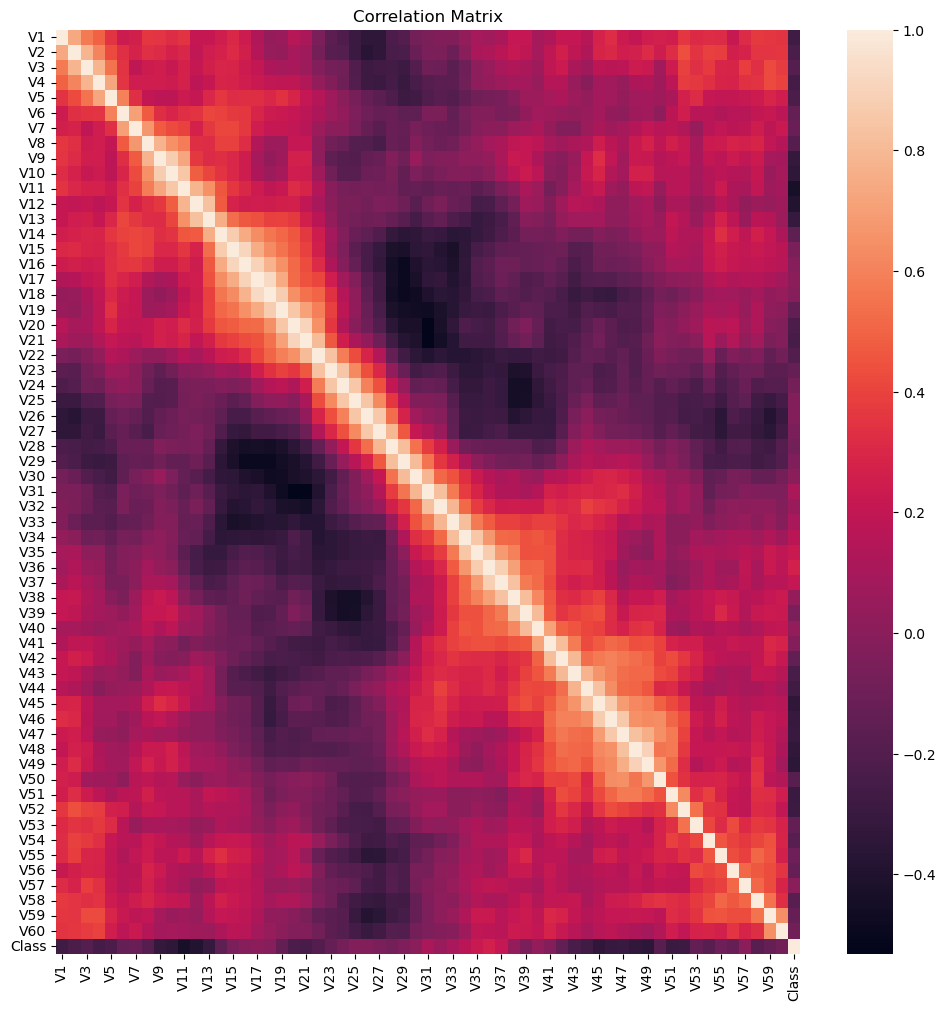

In [41]:
corr_matrix= df_sonar.corr()
plt.figure(figsize= (12,12))
sns.heatmap(corr_matrix, annot= False)
plt.title('Correlation Matrix')
plt.show()


In [26]:
X= df_sonar.drop('Class', axis= 1)
y= df_sonar['Class']

X.shape, y.shape

((208, 60), (208,))

In [43]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state= 12)

In [45]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [49]:
res= []
names= []
for name, model in models:
    kfold= KFold(n_splits= 10, random_state= 12, shuffle= True)
    cv_res= cross_val_score(model, X_train, y_train, cv= kfold, scoring= 'accuracy')
    res.append(cv_res)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_res.mean(), cv_res.std())
    print(msg)

LR: 0.722059 (0.115668)
KNN: 0.764338 (0.127181)
CART: 0.685662 (0.100849)
NB: 0.710662 (0.114445)
SVM: 0.746324 (0.112922)


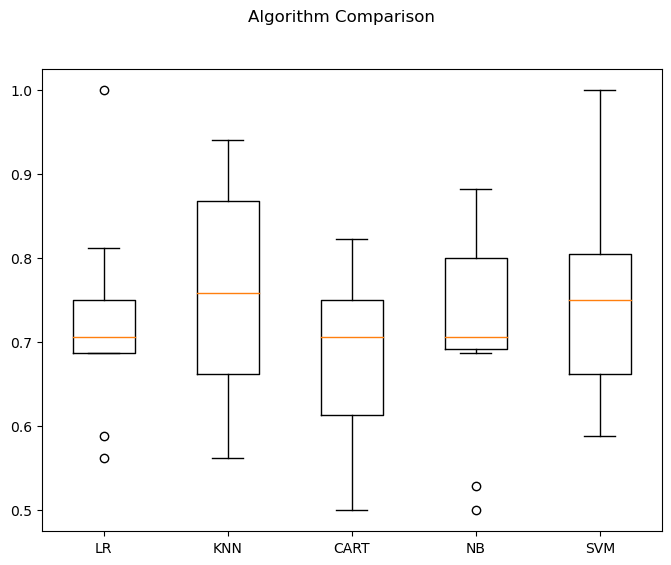

In [51]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(res)
ax.set_xticklabels(names)
fig.set_size_inches(8,6)
plt.show()

In [54]:
pipelines= []
pipelines.append(('Scaled_LR', Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression())])))
pipelines.append(('Scaled_KNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])))
pipelines.append(('Scaled_CART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeClassifier())])))
pipelines.append(('Scaled_NB', Pipeline([('Scaler', StandardScaler()), ('NB', GaussianNB())])))
pipelines.append(('Scaled_SVM', Pipeline([('Scaler', StandardScaler()), ('SVM', SVC())])))

In [55]:
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits= 10, random_state=12, shuffle= True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Scaled_LR: 0.728309 (0.095637)
Scaled_KNN: 0.788235 (0.135424)
Scaled_CART: 0.704044 (0.115411)
Scaled_NB: 0.710662 (0.114445)
Scaled_SVM: 0.799632 (0.127476)


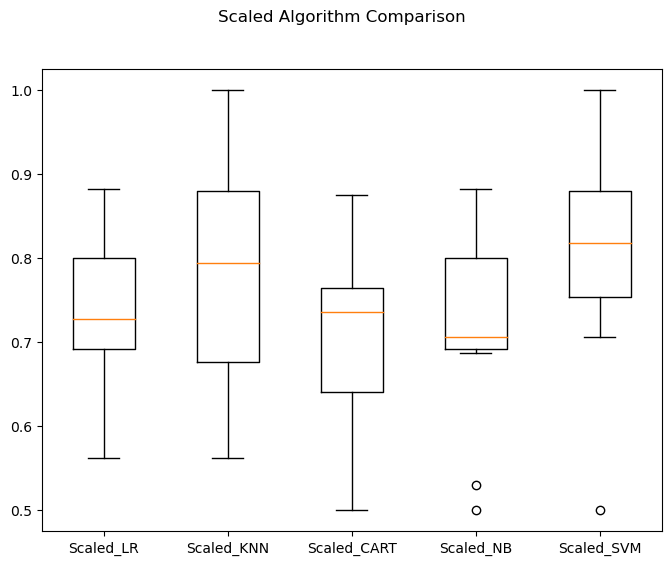

In [56]:
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(8,6)
plt.show()

In [59]:
# KNN algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,2,3,4,5,6,7,8,9,10]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=10, random_state=12, shuffle= True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(rescaledX, y_train)

In [62]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d mean: %f, standard_dev: %f with: %r" % (rank, mean, stdev, param))

Best: 0.836765 using {'n_neighbors': 1}
#1 mean: 0.836765, standard_dev: 0.116100 with: {'n_neighbors': 1}
#2 mean: 0.812868, standard_dev: 0.141565 with: {'n_neighbors': 2}
#3 mean: 0.811765, standard_dev: 0.131798 with: {'n_neighbors': 3}
#4 mean: 0.794485, standard_dev: 0.131692 with: {'n_neighbors': 4}
#5 mean: 0.788235, standard_dev: 0.135424 with: {'n_neighbors': 5}
#8 mean: 0.746324, standard_dev: 0.157566 with: {'n_neighbors': 6}
#7 mean: 0.751838, standard_dev: 0.125596 with: {'n_neighbors': 7}
#9 mean: 0.728309, standard_dev: 0.136994 with: {'n_neighbors': 8}
#6 mean: 0.752206, standard_dev: 0.146148 with: {'n_neighbors': 9}
#10 mean: 0.716912, standard_dev: 0.137384 with: {'n_neighbors': 10}


In [63]:
# SVM algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=10, random_state=12, shuffle= True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(rescaledX, y_train)

In [64]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d mean: %f standard_dev: %f with: %r" % (rank, mean, stdev, param))

Best: 0.841912 using {'C': 2.0, 'kernel': 'rbf'}
#18 mean: 0.722059 standard_dev: 0.104300 with: {'C': 0.1, 'kernel': 'linear'}
#40 mean: 0.511765 standard_dev: 0.132718 with: {'C': 0.1, 'kernel': 'poly'}
#39 mean: 0.590074 standard_dev: 0.202961 with: {'C': 0.1, 'kernel': 'rbf'}
#35 mean: 0.673529 standard_dev: 0.153268 with: {'C': 0.1, 'kernel': 'sigmoid'}
#32 mean: 0.686765 standard_dev: 0.087971 with: {'C': 0.3, 'kernel': 'linear'}
#38 mean: 0.619118 standard_dev: 0.140845 with: {'C': 0.3, 'kernel': 'poly'}
#14 mean: 0.746324 standard_dev: 0.146026 with: {'C': 0.3, 'kernel': 'rbf'}
#28 mean: 0.697426 standard_dev: 0.167294 with: {'C': 0.3, 'kernel': 'sigmoid'}
#27 mean: 0.698529 standard_dev: 0.085259 with: {'C': 0.5, 'kernel': 'linear'}
#37 mean: 0.661765 standard_dev: 0.087636 with: {'C': 0.5, 'kernel': 'poly'}
#11 mean: 0.763603 standard_dev: 0.145014 with: {'C': 0.5, 'kernel': 'rbf'}
#24 mean: 0.704044 standard_dev: 0.152494 with: {'C': 0.5, 'kernel': 'sigmoid'}
#23 mean: 0.704

In [65]:
# ensembles
ensembles = []
# Boosting methods
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
# Bagging methods
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))

In [67]:
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=10, random_state=12, shuffle= True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: mean: %f standard_dev: %f" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: mean: 0.813971 standard_dev: 0.084418
GBM: mean: 0.776471 standard_dev: 0.115652
RF: mean: 0.770588 standard_dev: 0.128468
ET: mean: 0.843382 standard_dev: 0.121303


In [68]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model= SVC(C=2.0)
model.fit(rescaledX, y_train)

SVC(C=2.0)

In [71]:
rescaled_Xtest= scaler.transform(X_test)
pred= model.predict(rescaled_Xtest)
print('Accuracy Score: ', accuracy_score(y_test, pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, pred))
print('Classification Report: \n', classification_report(y_test, pred))

Accuracy Score:  0.9285714285714286
Confusion Matrix: 
 [[26  0]
 [ 3 13]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        26
           1       1.00      0.81      0.90        16

    accuracy                           0.93        42
   macro avg       0.95      0.91      0.92        42
weighted avg       0.94      0.93      0.93        42

